### CSCN8000 –Artificial Intelligence Algorithms and Mathematics
#### Final Exam Part B

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from helper import get_embeddings
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans

### Load dataset and explore data

In [3]:
# Load the dataset
x_train = pd.read_csv('./Dataset/final_exam_part_b_dataset/x_train.csv')
y_train = pd.read_csv('./Dataset/final_exam_part_b_dataset/y_train.csv')
x_test = pd.read_csv('./Dataset/final_exam_part_b_dataset/x_test.csv')
y_test = pd.read_csv('./Dataset/final_exam_part_b_dataset/y_test.csv')

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 784)
y_train shape: (60000, 1)
x_test shape: (10000, 784)
y_test shape: (10000, 1)


#### Review data

In [4]:
print("x_train preview:\n", x_train.head())
print("y_train preview:\n", y_train.head())

x_train preview:
    0  1  2  3  4  5  6  7   8   9  ...  774  775  776  777  778  779  780  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  119  114  130   76    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    0    1    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   781  782  783  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 784 columns]
y_train preview:
    0
0  4
1  0
2  0
3  4
4  0


#### Null value check

In [5]:
print("Missing values in x_train:", x_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum().sum())

Missing values in x_train: 0
Missing values in y_train: 0


As there are no null values available in dataset, move forward to check distribution for the Y column

#### Check Distribution for labels

Label distribution:
 0
4    18000
0    12000
2    12000
3    12000
1     6000
Name: count, dtype: int64


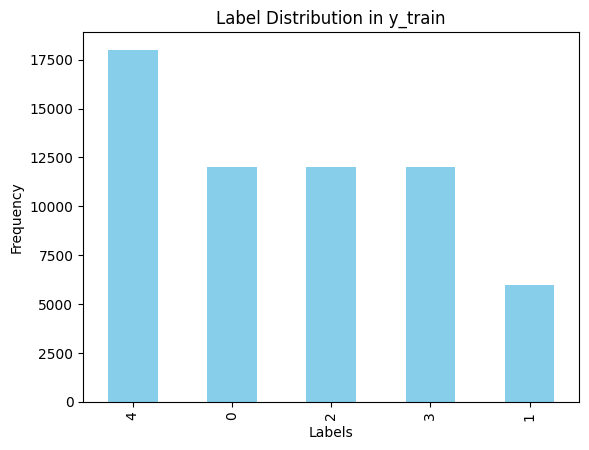

In [6]:
# Count label occurrences in y_train
label_counts = y_train['0'].value_counts()
print("Label distribution:\n", label_counts)

# Plot the label distribution
label_counts.plot(kind='bar', color='skyblue')
plt.title("Label Distribution in y_train")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()

#### Review sample images

Sample images for label 0:


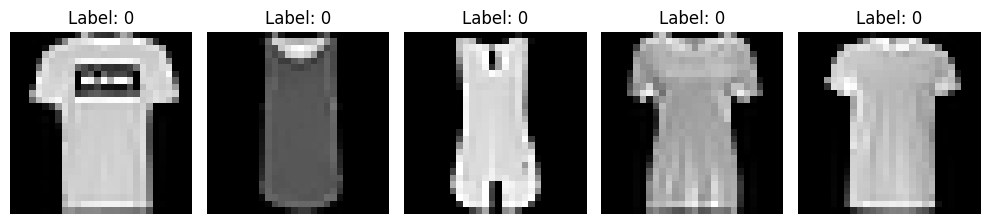

Sample images for label 1:


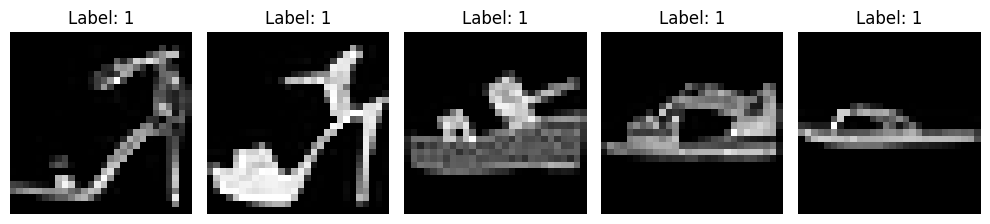

Sample images for label 2:


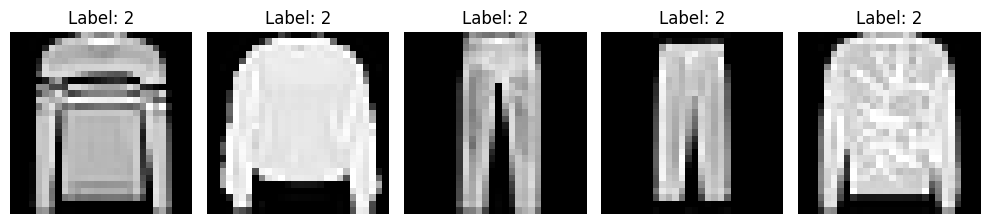

Sample images for label 3:


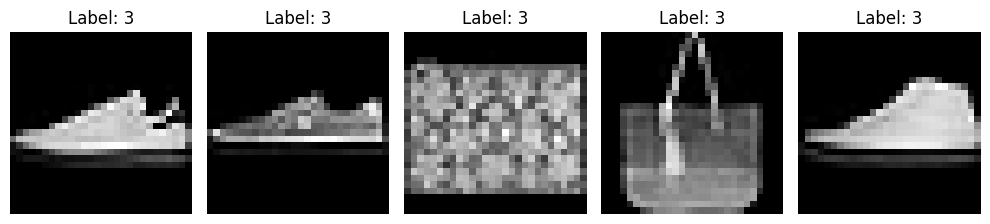

Sample images for label 4:


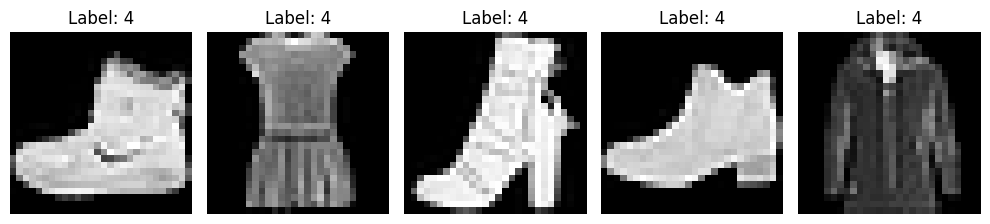

In [7]:
def plot_images_by_label(x_train, y_train, label, num_images=5):
    try:
        # Use the correct column name for labels
        label_column = '0'

        # Get the indices for the given label
        label_indices = y_train[y_train[label_column] == label].index

        # Check if there are enough images for the given label
        if len(label_indices) == 0:
            print(f"No images found for label {label}.")
            return

        # Select the first 'num_images' for this label
        sample_images = x_train.iloc[label_indices[:num_images]].values.reshape(-1, 28, 28)

        # Plot the images
        plt.figure(figsize=(10, 5))
        for i, img in enumerate(sample_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"Label: {label}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Visualize 5 sample images for each label (0-4)
for label in range(5):
    print(f"Sample images for label {label}:")
    plot_images_by_label(x_train, y_train, label)


### Part A: Model Training and Evaluation

#### Shallow classifier model : Logistic regression

- Simple shallow classifier 
- It identifies linear decision boundary
- Requires less computational resources
- It does not require complex transformation

In [9]:
# Initialize Logistic Regression
baseline_model = LogisticRegression(max_iter=500, random_state=42)

# 5-Fold Cross-Validation
cv_scores = cross_val_score(baseline_model, x_train, y_train['0'], cv=5, scoring='accuracy')

d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [10]:
print(f"Baseline Model (Logistic Regression) CV Accuracy: {cv_scores.mean():.4f}")

Baseline Model (Logistic Regression) CV Accuracy: 0.8589


##### Train Model

In [11]:
# Train Logistic Regression
baseline_model.fit(x_train, y_train['0'])

# Evaluate on Testing Set
y_pred_baseline = baseline_model.predict(x_test)
baseline_test_accuracy = accuracy_score(y_test['0'], y_pred_baseline)
print(f"Baseline Test Accuracy: {baseline_test_accuracy:.4f}")

d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline Test Accuracy: 0.8544


##### Train Bagging Model

In [17]:
# Scale the training and test data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Bagging Classifier with Logistic Regression
bagging_model = BaggingClassifier(estimator=baseline_model, n_estimators=10, random_state=42)

# Perform 5-fold cross-validation
cv_scores_bagging = cross_val_score(bagging_model, x_train_scaled, y_train['0'], cv=5, scoring='accuracy')
print(f"Bagging Model CV Accuracy: {cv_scores_bagging.mean():.4f}")

d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Conestoga\CSCN8000-AIAM\CSCN8000\venvCSCN8000\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

KeyboardInterrupt: 

In [ ]:
print(f"Bagging Model CV Accuracy: {cv_scores_bagging.mean():.4f}")

In [ ]:
# Train and Test
bagging_model.fit(x_train_scaled, y_train['0'])
y_pred_bagging = bagging_model.predict(x_test_scaled)
bagging_test_accuracy = accuracy_score(y_test['0'], y_pred_bagging)
print(f"Bagging Test Accuracy: {bagging_test_accuracy:.4f}")

##### Train Boosting Model

In [ ]:
# Boosting with Logistic Regression
boosting_model = AdaBoostClassifier(base_estimator=baseline_model, n_estimators=20, random_state=42)
cv_scores_boosting = cross_val_score(boosting_model, x_train, y_train['0'], cv=5, scoring='accuracy')
print(f"Boosting Model CV Accuracy: {cv_scores_boosting.mean():.4f}")

# Train and Test
boosting_model.fit(x_train, y_train['0'])
y_pred_boosting = boosting_model.predict(x_test)
boosting_test_accuracy = accuracy_score(y_test['0'], y_pred_boosting)
print(f"Boosting Test Accuracy: {boosting_test_accuracy:.4f}")

### Guessing the Mystery Label

In [ ]:
# Normalize data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define MLP Model
mlp_model = Sequential([
    Dense(256, activation='relu', input_dim=x_train.shape[1]),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # 5 output classes
])

# Compile and Train
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(x_train_scaled, y_train['0'], epochs=10, batch_size=32, validation_split=0.2)

#### Generate Embeddings

In [ ]:
# Generate embeddings for the test dataset
embeddings = get_embeddings(mlp_model, x_test_scaled)
print(f"Embeddings Shape: {embeddings.shape}")

#### PCA

In [ ]:
# PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=y_test['0'], cmap='viridis', alpha=0.5)
plt.title("PCA Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

#### LDA

In [ ]:
lda = LDA(n_components=2)
lda_embeddings = lda.fit_transform(embeddings, y_test['0'])

plt.scatter(lda_embeddings[:, 0], lda_embeddings[:, 1], c=y_test['0'], cmap='viridis', alpha=0.5)
plt.title("LDA Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

#### K-Means Clustering

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=cluster_labels, cmap='tab10', alpha=0.5)
plt.title("PCA with K-Means Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

#### Guess the Labels

In [ ]:
for cluster in range(5):
    sample_indices = [i for i, label in enumerate(cluster_labels) if label == cluster][:5]
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, 5, i+1)
        plt.imshow(x_test.iloc[idx].values.reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y_test['0'].iloc[idx]}")
        plt.axis('off')
    plt.show()